# 国会会議録スクリプト3本

このファイルには、

 - 国会会議録の検索結果を保存するスクリプト
 - 保存した結果から検索結果の件数を取得するスクリプト
 - 検索件数をグラフ化するスクリプト

の3本が含まれています。それぞれ必要に応じてお使いください。

***
## （1）国会会議録の検索結果を取得するスクリプト

- 国会会議録の検索結果を各年ごとにテキストファイルに保存するスクリプトです。
- 事前に以下を指定してください。
  - ファイルの保存先ディレクトリ
  - 保存ファイル名の先頭（仮に「hogehoge」と指定した場合、「hogehoge_1947」のように対象年が後についたファイル名となります）
  - 検索キーワードと検索対象期間（年次）

In [5]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
%matplotlib inline

#ファイルの保存先ディレクトリを指定
FILE_PATH = 'C:/Users/hoge/Desktop/G_kensyu/'
#保存ファイル名の先頭を指定
FILE_NAME = 'G_kensyu'

def kokkaiSearch(keyword, start, end):
    for i in range(start, end+1):
        url = 'http://kokkai.ndl.go.jp/api/speech?maximumRecords%3D100%26any%3D' + keyword + '%26from%3D' + str(i) +'-01-01%26until%3D' + str(i) + '-12-31' 
        req = requests.get(url)
        FILE_PATH2 = FILE_PATH + FILE_NAME + '_' + str(i) + '.txt'
        fw = open(FILE_PATH2, 'w', encoding='utf-8-sig')
        fw.write(req.text)
        fw.close()
        with open(FILE_PATH2, 'r', encoding='utf-8-sig') as fr:
            soup = BeautifulSoup(fr, 'html')
            nor = int(soup.find('numberofrecords').string)
            fr.close()
        count = 101
        while nor > 0:
            with open(FILE_PATH2, 'a', encoding='utf-8-sig') as fa:
                url = 'http://kokkai.ndl.go.jp/api/speech?startRecord%3D' + str(count) + '%26maximumRecords%3D100%26any%3D' + keyword + '%26from%3D' + str(i) + '-01-01%26until%3D' + str(i) + '-12-31'
                req = requests.get(url)
                fa.write(req.text)
                nor = nor - 100
                count += 100
                

#検索キーワードと検索対象期間（年次）を指定
kokkaiSearch('外国人技能研修', 1947, 2020)

## （2）保存した会議録群からキーワードの登場件数を抜き出すスクリプト
- （1）で取得した会議録群からキーワードの登場件数を抜き出し、CSVファイルに保存するスクリプトです。グラフ化の前段としてこの作業が必要になります。
- 事前に以下を指定してください。
  - 会議録のテキストファイルがあるディレクトリ
  - 会議録ファイル名の先頭（仮に「hogehoge_1947.txt」というファイル名だった場合、「hogehoge」の部分が先頭にあたります）
  - CSVファイルの保存先ディレクトリ

In [10]:
import csv
import pandas as pd
from bs4 import BeautifulSoup

#会議録のテキストファイルがあるディレクトリを指定
FILE_PATH = 'C:/Users/kaori/Desktop/G_kensyu/'
#上記会議録のファイル名先頭（対象年部分をのぞく）を指定
FILE_NAME = 'G_kensyu_'

FILE_PATH_NAME = FILE_PATH + FILE_NAME

#CSVファイルの保存ディレクトリを指定
FILE_SAVE = 'C:/Users/kaori/Desktop/'
FILE_PATH_SAVE = FILE_SAVE + FILE_NAME + 'result.csv'
fw = csv.writer(open(FILE_PATH_SAVE, 'w', encoding='utf-8-sig', newline='\n'),delimiter=',')

temp = {}

def Kokkai_csv(PATH, start, end):
    for i in range(start, end+1):
        with open(PATH + str(i) +'.txt', 'r', encoding='utf-8-sig') as fr:
            soup = BeautifulSoup(fr, 'lxml')
            nor = soup.find('numberofrecords').string
            temp[i] = nor

    fw.writerow(['year', 'records'])

    for i in range(start, end+1):
        fw.writerow([i, temp[i]])

Kokkai_csv(FILE_PATH_NAME, 1947, 2020)

## （3）キーワード登場件数の折れ線グラフを描くスクリプト
（2）で作成したキーワード登場件数の年次推移をもとに折れ線グラフを描くスクリプトです。
- 事前に以下を指定してください。
  - キーワード登場件数のCSVファイルがあるディレクトリ

<AxesSubplot:xlabel='year'>

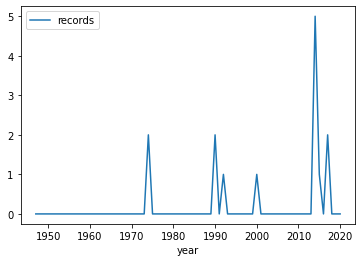

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#（２）で作成したCSVファイルのパスを指定
FILE_PATH_SAVE = 'C:/Users/hoge/Desktop/G_kensyu_result.csv'

s = pd.read_csv(FILE_PATH_SAVE, encoding='utf-8-sig')
s.plot(
    kind='line',
    x='year',
    y='records'
)